### 문제 정의 : 전국에서 신도림동의 연령별 인구 구조와 가장 형태가 비슷한 지역은 어디일까?


In [ ]:
#한글 깨짐 방지
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import pandas as pd
df = pd.read_csv("age.csv",encoding='utf-8',index_col=0)
df.head()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9770638,9770638,53738,59599,65815,70726,70037,69000,76377,73745,75639,70189,74217,80273,74774,71529,78329,82561,82083,90416,107254,109552,114315,122473,129497,141673,150625,156258,165662,165771,152776,151006,150177,144503,144300,145260,142644,157624,164934,168159,...,142867,132352,135608,123861,103339,110202,83062,85623,88133,85983,86008,79560,60652,63418,59401,72043,60979,49561,47432,42445,37293,33253,29705,25250,20503,17751,14506,12100,10729,8923,7199,5374,3972,2927,2813,2260,1565,1180,880,5932
서울특별시 종로구 (1111000000),152880,152880,593,683,775,874,852,863,1023,904,1012,923,1004,1151,1084,1005,1099,1180,1171,1338,1528,1767,1899,2122,2193,2454,2438,2572,2682,2598,2446,2234,2206,2161,2060,1949,1888,2149,2116,2219,...,2267,2204,2185,2014,1665,1796,1362,1387,1454,1432,1512,1369,1099,1215,1144,1424,1245,1044,1065,894,763,725,626,572,462,395,336,282,236,199,163,132,112,79,69,81,53,40,39,236
서울특별시 종로구 청운효자동(1111051500),13010,13010,66,79,72,98,98,94,108,109,115,95,125,142,130,105,136,124,134,151,155,147,172,143,181,188,139,163,171,186,151,137,168,157,172,160,162,193,178,232,...,150,138,160,131,132,124,91,103,115,106,119,118,95,103,92,125,94,87,103,83,64,67,62,47,47,31,30,12,21,14,9,8,14,6,7,9,4,2,2,16
서울특별시 종로구 사직동(1111053000),9584,9584,43,50,64,67,67,70,94,65,82,64,88,73,88,70,64,75,77,68,81,96,95,110,93,103,127,120,151,139,137,126,127,169,150,124,120,138,147,146,...,137,139,117,114,106,116,65,91,85,85,95,78,74,80,68,80,82,75,66,68,60,53,60,51,38,26,22,22,20,17,14,5,12,6,5,8,2,5,4,17
서울특별시 종로구 삼청동(1111054000),2820,2820,9,15,3,21,11,13,9,16,14,25,18,27,20,17,19,17,17,27,23,27,25,36,29,35,35,33,37,31,36,42,46,35,35,41,32,42,45,57,...,46,41,51,51,27,45,23,24,36,34,43,31,19,28,23,33,34,25,26,15,18,20,16,14,14,14,10,8,8,4,6,6,1,3,0,3,1,0,2,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3841 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 103 entries, 총인구수 to 100세 이상
dtypes: int64(103)
memory usage: 3.0+ MB


### 전처리

인구수 -> 인구비율로 데이터 전처리

In [ ]:
df = df.div(df['총인구수'],axis=0) #전체 데이터를 총 인구수로 나눠서 비율 변환
df.head()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),1.0,1.0,0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),1.0,1.0,0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),1.0,1.0,0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230
서울특별시 종로구 사직동(1111053000),1.0,1.0,0.004487,0.005217,0.006678,0.006991,0.006991,0.007304,0.009808,0.006782,0.008556,0.006678,0.009182,0.007617,0.009182,0.007304,0.006678,0.007826,0.008034,0.007095,0.008452,0.010017,0.009912,0.011477,0.009704,0.010747,0.013251,0.012521,0.015755,0.014503,0.014295,0.013147,0.013251,0.017634,0.015651,0.012938,0.012521,0.014399,0.015338,0.015234,...,0.014295,0.014503,0.012208,0.011895,0.011060,0.012104,0.006782,0.009495,0.008869,0.008869,0.009912,0.008139,0.007721,0.008347,0.007095,0.008347,0.008556,0.007826,0.006886,0.007095,0.006260,0.005530,0.006260,0.005321,0.003965,0.002713,0.002295,0.002295,0.002087,0.001774,0.001461,0.000522,0.001252,0.000626,0.000522,0.000835,0.000209,0.000522,0.000417,0.001774
서울특별시 종로구 삼청동(1111054000),1.0,1.0,0.003191,0.005319,0.001064,0.007447,0.003901,0.004610,0.003191,0.005674,0.004965,0.008865,0.006383,0.009574,0.007092,0.006028,0.006738,0.006028,0.006028,0.009574,0.008156,0.009574,0.008865,0.012766,0.010284,0.012411,0.012411,0.011702,0.013121,0.010993,0.012766,0.014894,0.016312,0.012411,0.012411,0.014539,0.011348,0.014894,0.015957,0.020213,...,0.016312,0.014539,0.018085,0.018085,0.009574,0.015957,0.008156,0.008511,0.012766,0.012057,0.015248,0.010993,0.006738,0.009929,0.008156,0.011702,0.012057,0.008865,0.009220,0.005319,0.006383,0.007092,0.005674,0.004965,0.004965,0.004965,0.003546,0.002837,0.0028

필요없는 데이터 삭제

In [ ]:
del df['총인구수'], df['연령구간인구수']
df.head()

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,38세,39세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,0.016667,0.016582,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,0.014410,0.014240,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,0.018063,0.017371,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230
서울특별시 종로구 사직동(1111053000),0.004487,0.005217,0.006678,0.006991,0.006991,0.007304,0.009808,0.006782,0.008556,0.006678,0.009182,0.007617,0.009182,0.007304,0.006678,0.007826,0.008034,0.007095,0.008452,0.010017,0.009912,0.011477,0.009704,0.010747,0.013251,0.012521,0.015755,0.014503,0.014295,0.013147,0.013251,0.017634,0.015651,0.012938,0.012521,0.014399,0.015338,0.015234,0.016590,0.013982,...,0.014295,0.014503,0.012208,0.011895,0.011060,0.012104,0.006782,0.009495,0.008869,0.008869,0.009912,0.008139,0.007721,0.008347,0.007095,0.008347,0.008556,0.007826,0.006886,0.007095,0.006260,0.005530,0.006260,0.005321,0.003965,0.002713,0.002295,0.002295,0.002087,0.001774,0.001461,0.000522,0.001252,0.000626,0.000522,0.000835,0.000209,0.000522,0.000417,0.001774
서울특별시 종로구 삼청동(1111054000),0.003191,0.005319,0.001064,0.007447,0.003901,0.004610,0.003191,0.005674,0.004965,0.008865,0.006383,0.009574,0.007092,0.006028,0.006738,0.006028,0.006028,0.009574,0.008156,0.009574,0.008865,0.012766,0.010284,0.012411,0.012411,0.011702,0.013121,0.010993,0.012766,0.014894,0.016312,0.012411,0.012411,0.014539,0.011348,0.014894,0.015957,0.020213,0.015248,0.017021,...,0.016312,0.014539,0.018085,0.018085,0.009574,0.015957,0.008156,0.008511,0.012766,0.012057,0.015248,0.010993,0.006738,0.009929,0.008156,0.011702,0.012057,0.008865,0.009220,0.005319,0.006383,0.007092,0.005674,0.0049

### 지역 이름 받고 해당 지역의 인구 구조 저장하기

In [ ]:
name = input('인구 구조가 알고 싶은 지역의 이름 (읍면동 단위)을 입력해주세요 : ')
a = df.index.str.contains(name)
df2=df[a]
df2

인구 구조가 알고 싶은 지역의 이름 (읍면동 단위)을 입력해주세요 : 보람동


,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,38세,39세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
세종특별자치시 보람동(3611056000),0.01522,0.014609,0.016137,0.018765,0.017787,0.018826,0.021638,0.020905,0.017787,0.018276,0.016504,0.015709,0.014548,0.012347,0.01198,0.011369,0.00923,0.010636,0.008007,0.008374,0.010513,0.01033,0.009046,0.009474,0.01033,0.010391,0.013081,0.011858,0.010269,0.013447,0.015465,0.014487,0.017604,0.01577,0.019621,0.023411,0.027139,0.026039,0.026406,0.025733,...,0.007702,0.006479,0.007274,0.005073,0.005379,0.004645,0.003484,0.003301,0.004401,0.003178,0.003056,0.002017,0.0011,0.001222,0.001589,0.001834,0.001345,0.000672,0.000917,0.001161,0.000795,0.000795,0.000978,0.00055,0.000672,0.000306,0.000489,0.000611,0.000306,0.000367,0.000183,0.000244,0.000061,0.000183,0.000061,0.0,0.000061,0.0,0.0,0.000061


입력한 지역 인구구조 시각화

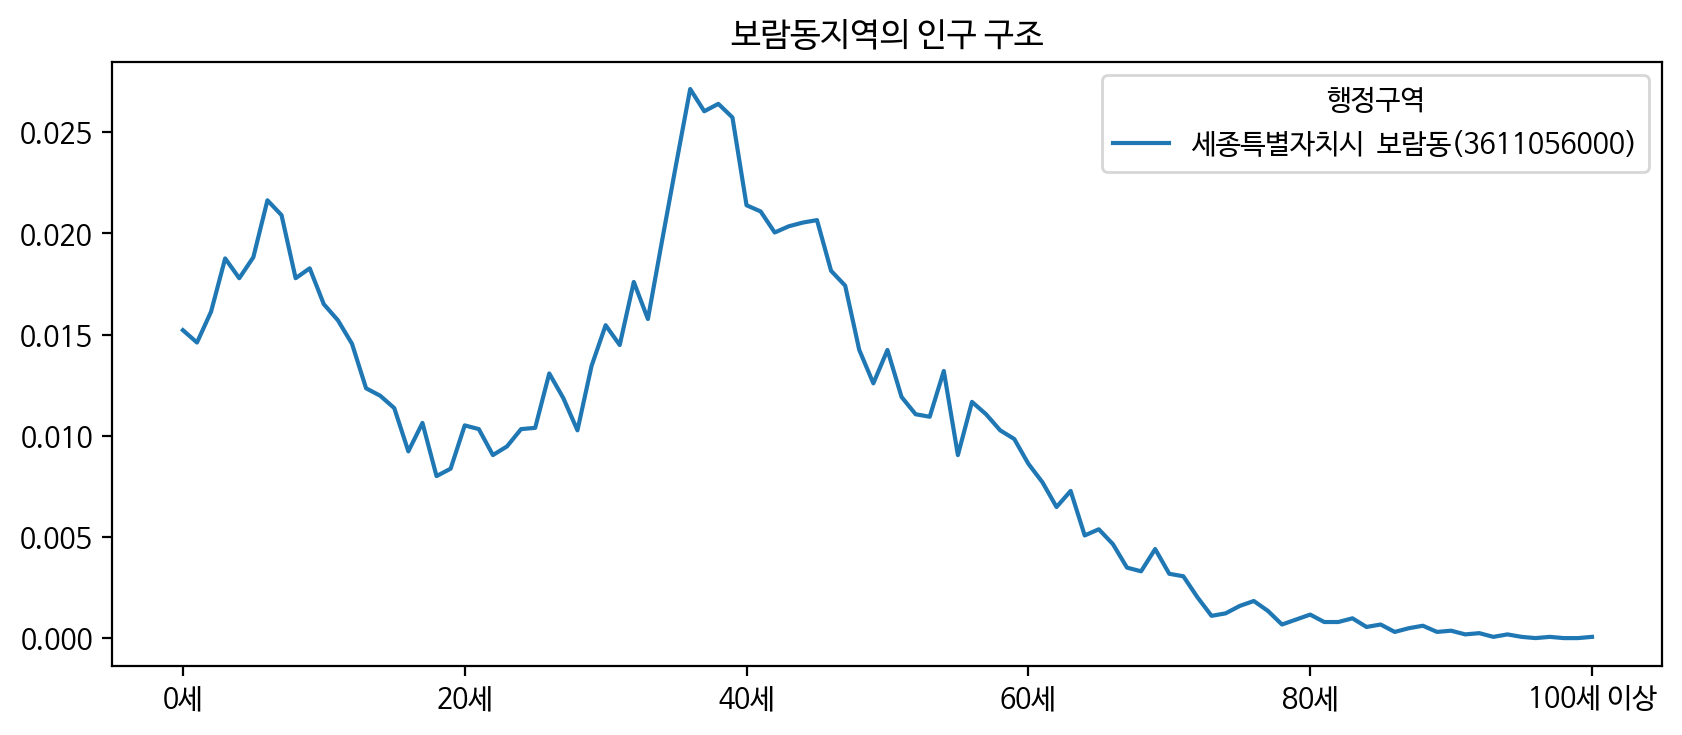

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,4)
plt.rcParams['figure.dpi']=100

plt.rc('font',family = 'NanumBarunGothic')
df2.T.plot()
plt.title(name+'지역의 인구 구조')
plt.show()

### 입력한 지역 인구구조와 가장 비슷한 인구구조 가진 지역 시각화

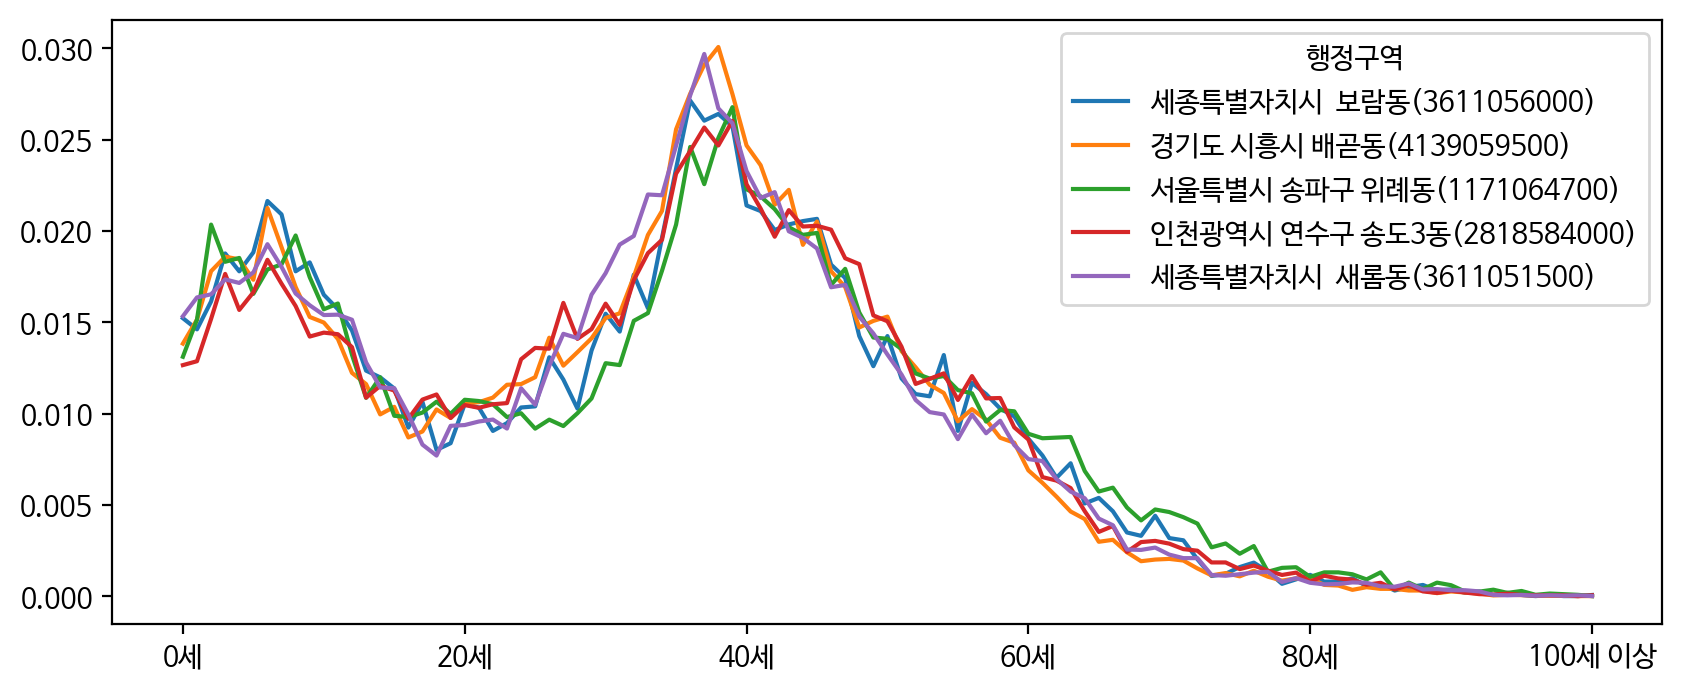

In [ ]:
import numpy as np
df.loc[np.power(df.sub(df2.iloc[0],axis=1),2).sum(axis=1).sort_values().index[:5]].T.plot()
#df2.iloc[0],axis=1 :보람동 행을 열기준으로 
#df.sub(위의 코드) : 보람동 - 나머지 동들
#np.power(위으코드),2 : 제곱 - 음의 값을 양으로 전환
#sum(axis=1) : 열기준으로 더하기 
#.sort_value().index[:5] : 오름차순으로 정렬 후 차이가 없는 top5 출력
plt.show()

### 코드 하나로 합치기

인구 구조가 알고 싶은 지역의 이름 (읍면동 단위)을 입력해주세요 : 보람동


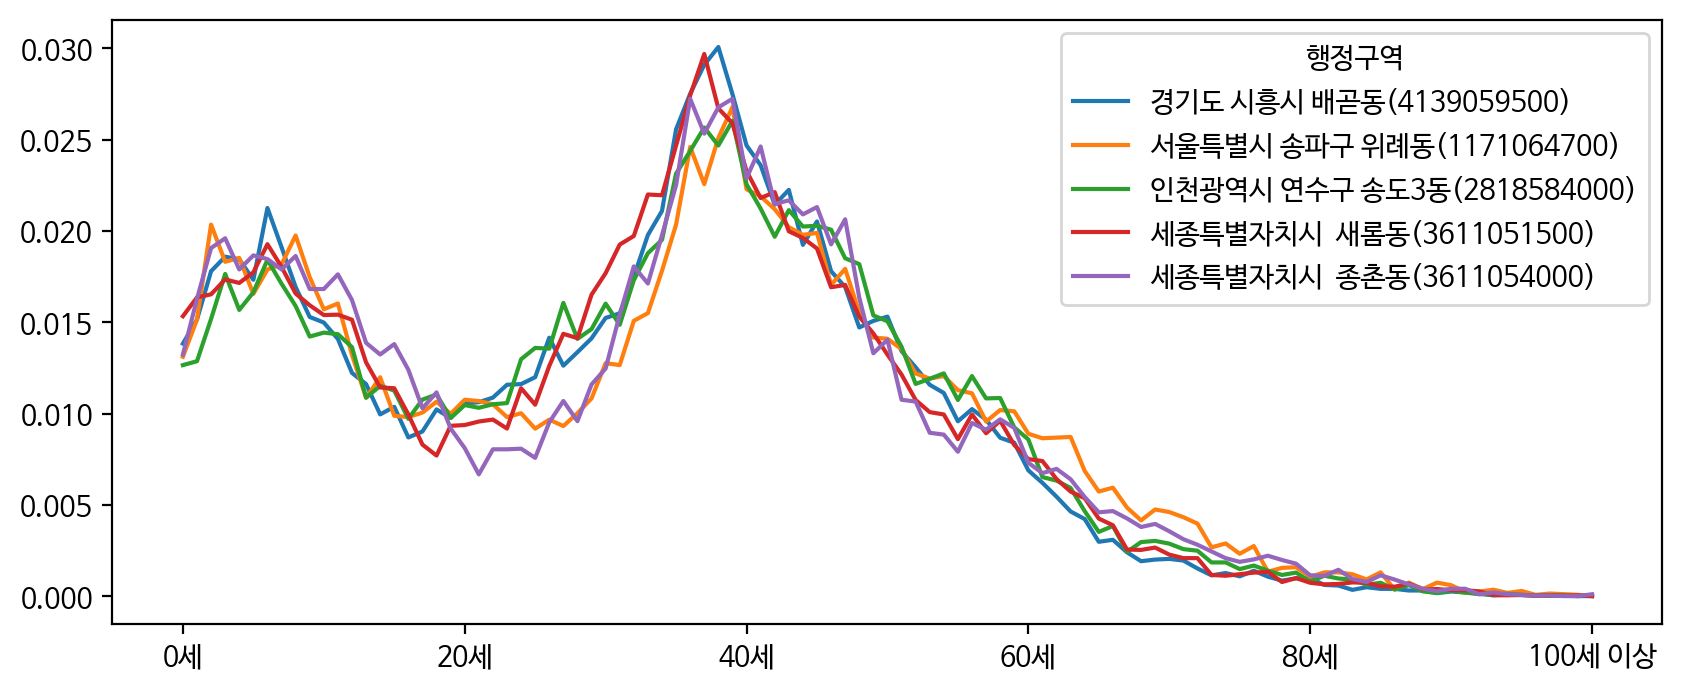

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,4)
plt.rcParams['figure.dpi']=100

plt.rc('font',family = 'NanumBarunGothic')
#데이터 가져오기
df = pd.read_csv("age.csv",encoding='utf-8',index_col=0)

#전체 데이터를 총 인구수로 나눠서 비율 변환
df = df.div(df['총인구수'],axis=0) 

#필요없는 컬럼 제거
del df['총인구수'], df['연령구간인구수']

#지역 이름 입력
name = input('인구 구조가 알고 싶은 지역의 이름 (읍면동 단위)을 입력해주세요 : ')

#해당 행을 찾아서 해당 지역의 인구 구조를 저장
a = df.index.str.contains(name)
df2=df[a]

#인구 구조가 같은 지역찾아서 지도 시각화 (top5 - [1:6]:본인 제외)
df.loc[np.power(df.sub(df2.iloc[0],axis=1),2).sum(axis=1).sort_values().index[1:6]].T.plot()
plt.show()

### 다시 알아보기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,4)
plt.rcParams['figure.dpi']=100

plt.rc('font',family = 'NanumBarunGothic')
#데이터 가져오기
df = pd.read_csv("age.csv",encoding='utf-8',index_col=0)

#전체 데이터를 총 인구수로 나눠서 비율 변환
df = df.div(df['총인구수'],axis=0) 

#필요없는 컬럼 제거
del df['총인구수'], df['연령구간인구수']

#지역 이름 입력
name = input('인구 구조가 알고 싶은 지역의 이름 (읍면동 단위)을 입력해주세요 : ')

#해당 행을 찾아서 해당 지역의 인구 구조를 저장
a = df.index.str.contains(name)
df2=df[a]

인구 구조가 알고 싶은 지역의 이름 (읍면동 단위)을 입력해주세요 : 보람동


In [ ]:
x=df.sub(df.iloc[0],axis=1)
x.head()

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,38세,39세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
서울특별시 종로구 (1111000000),-0.001621,-0.001632,-0.001667,-0.001522,-0.001595,-0.001417,-0.001125,-0.001634,-0.001122,-0.001146,-0.001029,-0.000687,-0.000562,-0.000747,-0.000828,-0.000731,-0.000741,-0.000502,-0.000982,0.000346,0.000722,0.001345,0.001091,0.001552,0.000531,0.000831,0.000588,0.000027,0.000363,-0.000842,-0.000941,-0.000654,-0.001294,-0.002118,-0.002250,-0.002076,-0.003040,-0.002696,-0.002257,-0.002342,...,0.000207,0.000871,0.000413,0.000497,0.000314,0.000469,0.000408,0.000309,0.000491,0.000567,0.001087,0.000812,0.000981,0.001457,0.001403,0.001941,0.001903,0.001756,0.002112,0.001504,0.001174,0.001339,0.001054,0.001157,0.000924,0.000767,0.000713,0.000606,0.000446,0.000388,0.000329,0.000313,0.000326,0.000217,0.000163,0.000299,0.000187,0.000141,0.000165,0.000937
서울특별시 종로구 청운효자동(1111051500),-0.000427,-0.000028,-0.001202,0.000294,0.000365,0.000163,0.000484,0.000831,0.001098,0.000118,0.002012,0.002699,0.002339,0.000750,0.002437,0.001081,0.001899,0.002353,0.000937,0.000087,0.001521,-0.001543,0.000659,-0.000049,-0.004732,-0.003464,-0.003811,-0.002670,-0.004030,-0.004925,-0.002457,-0.002722,-0.001548,-0.002569,-0.002147,-0.001298,-0.003199,0.000622,0.001396,0.000790,...,-0.003092,-0.002939,-0.001581,-0.002608,-0.000430,-0.001748,-0.001507,-0.000846,-0.000181,-0.000653,0.000344,0.000927,0.001094,0.001426,0.000992,0.002235,0.000984,0.001615,0.003062,0.002036,0.001102,0.001747,0.001725,0.001028,0.001514,0.000566,0.000821,-0.000316,0.000516,0.000163,-0.000045,0.000065,0.000670,0.000162,0.000250,0.000460,0.000147,0.000033,0.000064,0.000623
서울특별시 종로구 사직동(1111053000),-0.001013,-0.000883,-0.000058,-0.000248,-0.000177,0.000242,0.001991,-0.000765,0.000814,-0.000506,0.001586,-0.000599,0.001529,-0.000017,-0.001339,-0.000624,-0.000367,-0.002159,-0.002526,-0.001196,-0.001787,-0.001057,-0.003550,-0.003753,-0.002165,-0.003472,-0.001200,-0.002463,-0.001342,-0.002308,-0.002119,0.002844,0.000882,-0.001929,-0.002078,-0.001733,-0.001543,-0.001977,-0.000076,-0.002600,...,-0.000327,0.000957,-0.001671,-0.000782,0.000484,0.000825,-0.001719,0.000732,-0.000151,0.000069,0.001110,-0.000004,0.001514,0.001857,0.001016,0.000974,0.002315,0.002753,0.002032,0.002751,0.002444,0.002127,0.003220,0.002737,0.001867,0.000896,0.000811,0.001057,0.000989,0.000861,0.000724,-0.000028,0.000846,0.000326,0.000234,0.000603,0.000049,0.000401,0.000327,0.001167
서울특별시 종로구 삼청동(1111054000),-0.002308,-0.000781,-0.005672,0.000208,-0.003267,-0.002452,-0.004626,-0.001874,-0.002777,0.001682,-0.001213,0.001359,-0.000561,-0.001292,-0.001279,-0.002422,-0.002373,0.000321,-0.002821,-0.001638,-0.002835,0.000231,-0.002970,-0.002089,-0.003005,-0.004290,-0.003835,-0.005973,-0.002870,-0.000561,0.000942,-0.002378,-0.002357,-0.000328,-0.003252,-0.001239,-0.000923,0.003002,-0.001418,0.000440,...,0.001690,0.000993,0.004206,0.005408,-0.001002,0.004679,-0.000345,-0.000253,0.0037

In [ ]:
y=np.power(x,2)
y.head()

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,38세,39세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
서울특별시 종로구 (1111000000),2.627928e-06,2.664240e-06,2.777765e-06,2.315645e-06,2.544378e-06,2.007959e-06,1.266681e-06,2.671522e-06,1.258634e-06,1.313891e-06,0.000001,4.719100e-07,3.162944e-07,5.580512e-07,6.857987e-07,5.349998e-07,5.496508e-07,2.518893e-07,9.651246e-07,1.195193e-07,5.207888e-07,1.810012e-06,1.190051e-06,2.408497e-06,2.820265e-07,6.906322e-07,3.458450e-07,7.551211e-10,1.319439e-07,7.094906e-07,8.847599e-07,4.280376e-07,1.674742e-06,4.487751e-06,0.000005,0.000004,9.239504e-06,7.268388e-06,5.092122e-06,5.484004e-06,...,4.266246e-08,7.580220e-07,1.706688e-07,2.468818e-07,9.885394e-08,2.198494e-07,1.662709e-07,9.559129e-08,2.406280e-07,3.211283e-07,1.182459e-06,6.592980e-07,9.624913e-07,0.000002,1.969676e-06,3.767779e-06,3.619872e-06,0.000003,0.000004,2.260770e-06,0.000001,0.000002,0.000001,0.000001,8.529409e-07,5.882215e-07,5.085828e-07,3.674538e-07,1.985669e-07,1.508764e-07,1.085019e-07,9.822397e-08,1.063260e-07,4.716461e-08,2.670968e-08,8.911542e-08,3.478350e-08,1.984523e-08,2.723697e-08,8.771620e-07
서울특별시 종로구 청운효자동(1111051500),1.822668e-07,7.592375e-10,1.444308e-06,8.645987e-08,1.329025e-07,2.664616e-08,2.345606e-07,6.898250e-07,1.205373e-06,1.402077e-08,0.000004,7.284294e-06,5.472720e-06,5.623549e-07,5.937619e-06,1.169039e-06,3.605376e-06,5.534767e-06,8.774775e-07,7.505039e-09,2.312679e-06,2.381638e-06,4.338670e-07,2.445225e-09,2.239180e-05,1.199781e-05,1.452639e-05,7.126477e-06,1.623912e-05,2.425286e-05,6.037296e-06,7.408604e-06,2.396735e-06,6.598529e-06,0.000005,0.000002,1.023228e-05,3.866225e-07,1.950103e-06,6.233595e-07,...,9.563446e-06,8.635758e-06,2.499253e-06,6.800002e-06,1.852811e-07,3.054683e-06,2.269739e-06,7.162403e-07,3.270112e-08,4.258385e-07,1.184114e-07,8.596667e-07,1.197924e-06,0.000002,9.839487e-07,4.993328e-06,9.685817e-07,0.000003,0.000009,4.143545e-06,0.000001,0.000003,0.000003,0.000001,2.292728e-06,3.203704e-07,6.744782e-07,9.987931e-08,2.663149e-07,2.651977e-08,2.027144e-09,4.211536e-09,4.483256e-07,2.611866e-08,6.257214e-08,2.120329e-07,2.169200e-08,1.086223e-09,4.052867e-09,3.877529e-07
서울특별시 종로구 사직동(1111053000),1.026784e-06,7.792970e-07,3.387458e-09,6.140908e-08,3.143215e-08,5.849861e-08,3.964166e-06,5.859545e-07,6.633563e-07,2.559041e-07,0.000003,3.586529e-07,2.337966e-06,2.880442e-10,1.792862e-06,3.898332e-07,1.345151e-07,4.659940e-06,6.378598e-06,1.429638e-06,3.195143e-06,1.117964e-06,1.260262e-05,1.408346e-05,4.686508e-06,1.205299e-05,1.439183e-06,6.065887e-06,1.799832e-06,5.327646e-06,4.490088e-06,8.088567e-06,7.785352e-07,3.720123e-06,0.000004,0.000003,2.379346e-06,3.908228e-06,5.839

In [ ]:
z=y.sum(axis=1)
z.head()

행정구역
서울특별시  (1100000000)            0.000000
서울특별시 종로구 (1111000000)         0.000143
서울특별시 종로구 청운효자동(1111051500)    0.000323
서울특별시 종로구 사직동(1111053000)      0.000230
서울특별시 종로구 삼청동(1111054000)      0.000745
dtype: float64

In [ ]:
i = z.sort_values().index[:5]
i

Index(['서울특별시  (1100000000)', '서울특별시 구로구 (1153000000)',
       '서울특별시 은평구 (1138000000)', '서울특별시 서대문구 (1141000000)',
       '경기도 성남시 수정구 (4113100000)'],
      dtype='object', name='행정구역')